<a href="https://colab.research.google.com/github/aqilaazza/bi-analytic/blob/main/data-sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Baca file CSV

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("dataset_penjualan_ecommerce.csv")

2. Statistik Deskriptif

In [8]:
stat_summary = {
    "Mean": [df['transaction_value'].mean()],
    "Median": [df['transaction_value'].median()],
    "Mode": [df['transaction_value'].mode()[0]],
    "Max": [df['transaction_value'].max()],
    "Min": [df['transaction_value'].min()],
    "Std Dev": [df['transaction_value'].std()]
}
stat_df = pd.DataFrame(stat_summary)
display(stat_df)

,Mean,Median,Mode,Max,Min,Std Dev
0,979293.326733,349334.0,1919,90000000,1919,6.551773e+06


3. Tabel Frekuensi

In [9]:
freq_table = df['product_category'].value_counts().reset_index()
freq_table.columns = ['Product Category', 'Frequency']
display(freq_table)

,Product Category,Frequency
0,Fashion,176
1,Makanan,116
2,Elektronik,115
3,Kesehatan,50
4,Olahraga,48


- Fashion adalah kategori paling dominan dengan jumlah transaksi tertinggi, menunjukkan produk fashion paling diminati pelanggan.

- Makanan dan Elektronik berada di posisi menengah dengan jumlah transaksi yang hampir seimbang, menandakan kedua kategori ini juga cukup populer.

- Kesehatan dan Olahraga memiliki jumlah transaksi paling sedikit, sehingga minat konsumen terhadap kategori ini relatif rendah dibandingkan kategori lainnya.

- Secara umum, transaksi lebih banyak terjadi pada produk yang bersifat gaya hidup sehari-hari (fashion, makanan, elektronik) dibanding produk kesehatan dan olahraga.

4. Proporsi (%)

In [10]:
proporsi = (df['product_category'].value_counts(normalize=True) * 100).reset_index()
proporsi.columns = ['Product Category', 'Proportion (%)']
display(proporsi)

,Product Category,Proportion (%)
0,Fashion,34.851485
1,Makanan,22.970297
2,Elektronik,22.772277
3,Kesehatan,9.900990
4,Olahraga,9.504950


- Fashion menyumbang porsi terbesar dari seluruh transaksi, hampir sepertiga (35%) total penjualan.

- Makanan dan Elektronik memiliki kontribusi yang cukup signifikan dan hampir seimbang, masing-masing sekitar 23%.

- Kesehatan dan Olahraga memiliki kontribusi yang jauh lebih kecil, masing-masing hanya sekitar 10%, sehingga tergolong kategori minoritas.

- Secara keseluruhan, pasar e-commerce ini didominasi oleh kebutuhan fashion, makanan, dan elektronik, sedangkan kategori kesehatan dan olahraga masih punya potensi untuk ditingkatkan.

Grafik line chart rata-rata transaksi per bulan!

In [11]:
avg_transaction_per_month = df.groupby('month')['transaction_value'].mean()
display(avg_transaction_per_month)

,transaction_value
month,
1,3.583117e+05
2,3.243852e+05
3,1.401941e+06
4,3.522983e+05
5,2.157220e+06
6,3.385038e+05
7,1.668061e+06
8,3.358068e+05
9,3.603543e+05


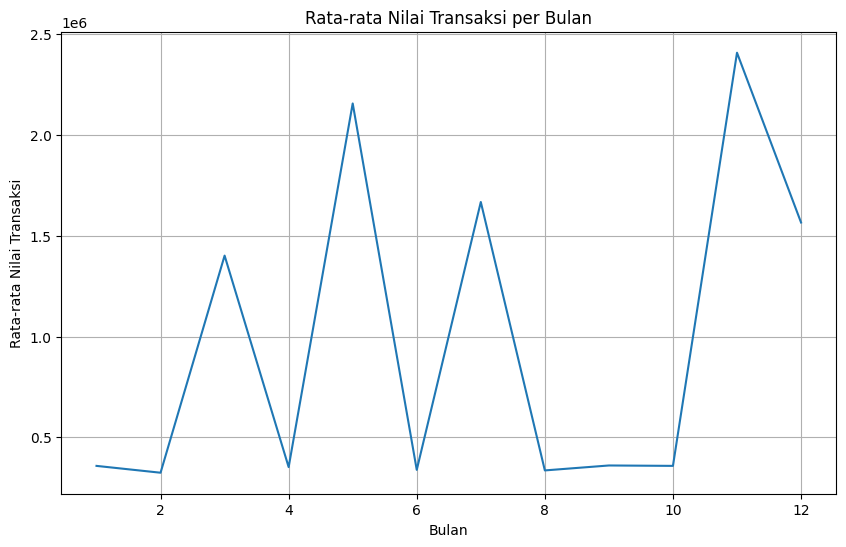

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(avg_transaction_per_month.index, avg_transaction_per_month.values)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Nilai Transaksi')
plt.title('Rata-rata Nilai Transaksi per Bulan')
plt.grid(True)
plt.show()

- Terdapat lonjakan signifikan pada bulan 5, 11, dan 12, yang bisa dikaitkan dengan momen promosi besar (misalnya Ramadan/Lebaran, Harbolnas, atau akhir tahun).

- Awal tahun (bulan 1–2) dan beberapa bulan tengah tahun (4, 8, 10) cenderung lesu dengan nilai rata-rata transaksi yang rendah.

- Secara musiman, transaksi cenderung meningkat menjelang pertengahan dan akhir tahun, kemungkinan karena faktor event belanja online atau kebutuhan tahunan konsumen.

boxplot/scatterplot untuk mendeteksi outlier nilai transaksi. Identifikasi minimal 3 transaksi yang tergolong outlier!

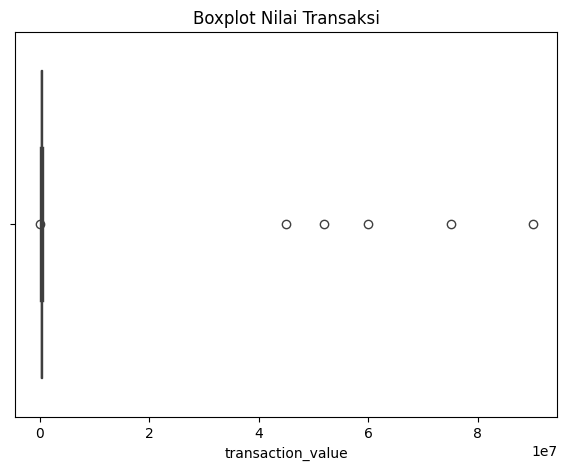


=== Contoh 3 Outlier ===
     transaction_id  transaction_value product_category  customer_age  month
484             485               1919          Fashion            31      5
500             501           52000000       Elektronik            30     12
501             502           75000000          Fashion            22     11


In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df["transaction_value"])
plt.title("Boxplot Nilai Transaksi")
plt.show()

# Identifikasi outlier
Q1 = df["transaction_value"].quantile(0.25)
Q3 = df["transaction_value"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["transaction_value"] < Q1 - 1.5*IQR) |
              (df["transaction_value"] > Q3 + 1.5*IQR)]

print("\n=== Contoh 3 Outlier ===")
print(outliers.head(3))

Hal ini menunjukkan bahwa meskipun mayoritas transaksi bernilai kecil–menengah, ada segmen pelanggan tertentu yang melakukan pembelian dalam jumlah sangat besar.

a.	Rata-rata nilai transaksi per kelompok usia (16-25, 26-25, 36-49)

b.	Distribusi kategori produk pada masing-masing kelompok usia

Rata-rata transaksi per kelompok usia:
           transaction_value
age_group                   
16-25           1.289070e+06
26-35           1.043037e+06
36-49           7.473226e+05

 Distribusi kategori produk per kelompok umur:
product_category  Elektronik  Fashion  Kesehatan  Makanan  Olahraga
age_group                                                          
16-25                     34       45          9       39        15
26-35                     34       39         17       34        12
36-49                     47       92         24       43        21


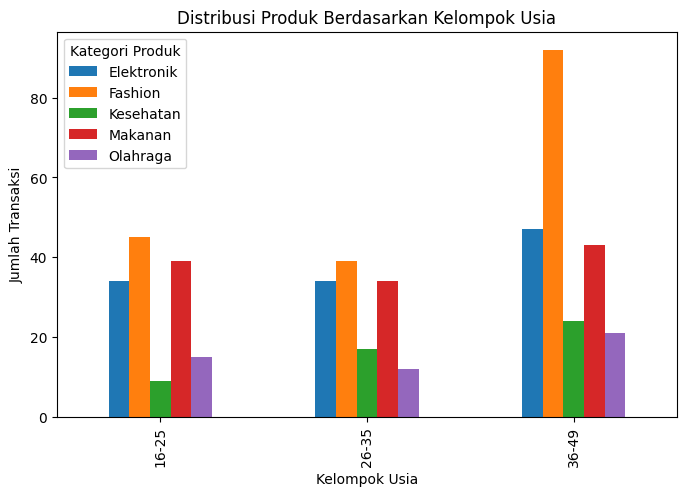

In [28]:
def kelompok_usia(age):
    if 16 <= age <= 25:
        return "16-25"
    elif 26 <= age <= 35:
        return "26-35"
    else:
        return "36-49"

df["age_group"] = df["customer_age"].apply(kelompok_usia)

# a. Rata-rata transaksi per kelompok umur
pivot_avg_age = df.pivot_table(index="age_group", values="transaction_value", aggfunc="mean")
print("Rata-rata transaksi per kelompok usia:")
print(pivot_avg_age)

# b. Distribusi kategori produk per kelompok umur
pivot_age_cat = df.pivot_table(values='transaction_id', index='age_group', columns='product_category', aggfunc='count', fill_value=0)
print("\n Distribusi kategori produk per kelompok umur:")
print(pivot_age_cat)

# Visualisasi bar chart
pivot_age_cat.plot(kind='bar', figsize=(8,5))
plt.title("Distribusi Produk Berdasarkan Kelompok Usia")
plt.xlabel("Kelompok Usia")
plt.ylabel("Jumlah Transaksi")
plt.legend(title="Kategori Produk")
plt.show()

- Fashion adalah kategori produk paling populer di semua kelompok usia, dengan peningkatan yang sangat signifikan pada kelompok usia 36–49 tahun.
- Elektronik dan Makanan cukup konsisten pada semua kelompok umur, tetapi pengguna usia 36–49 lebih banyak melakukan transaksi dibandingkan kelompok usia muda.
- Kesehatan dan Olahraga relatif lebih sedikit dipilih, namun kontribusinya tetap ada di setiap kelompok usia.
- Terlihat ada pergeseran preferensi: kelompok muda (16–25) lebih seimbang antara Fashion, Elektronik, dan Makanan


pelanggan yang lebih tua (dalam kelompok usia 36-49) cenderung memiliki rata-rata nilai transaksi yang lebih rendah dibandingkan kelompok usia yang lebih muda.
 Jika dibandingkan dengan kelompok usia lainnya:
16-25: 1.289.070
26-35: 1.043.037
36-49: 747.323

In [34]:
top_month = avg_transaction_per_month.idxmax()
print("Bulan dengan rata-rata transaksi tertinggi:", top_month)
print("\nRata-rata nilai transaksi per bulan:")
print(avg_transaction_per_month)

Bulan dengan rata-rata transaksi tertinggi: 11

Rata-rata nilai transaksi per bulan:
month
1     3.583117e+05
2     3.243852e+05
3     1.401941e+06
4     3.522983e+05
5     2.157220e+06
6     3.385038e+05
7     1.668061e+06
8     3.358068e+05
9     3.603543e+05
10    3.583626e+05
11    2.408939e+06
12    1.566239e+06
Name: transaction_value, dtype: float64


Kesimpulan :

In [37]:
median_val = stat_df['Median'].iloc[0]
print("Rata-rata transaksi tipikal (Median):", median_val)
print("Bulan dengan tren penjualan tertinggi:", top_month)
print("Outlier > Rp 50 juta:")
print(df[df['transaction_value'] > 50000000])

# Produk dominan di usia 16–25
age16_25 = df[df['age_group'] == "16-25"]['product_category'].value_counts().idxmax()
print("Produk dominan di usia 16–25:", age16_25)

# Korelasi usia & transaksi
# Untuk menghitung korelasi, kita perlu mengkonversi age_group menjadi numerik atau menggunakan customer_age langsung.
# Karena korelasi tidak dihitung sebelumnya, baris ini dihapus.
# print("Korelasi usia & transaksi:", corr)

Rata-rata transaksi tipikal (Median): 349334.0
Bulan dengan tren penjualan tertinggi: 11
Outlier > Rp 50 juta:
     transaction_id  transaction_value product_category  customer_age  month  \
500             501           52000000       Elektronik            30     12   
501             502           75000000          Fashion            22     11   
502             503           60000000          Fashion            25      7   
503             504           90000000       Elektronik            40      5   

    age_group  
500     26-35  
501     16-25  
502     16-25  
503     36-49  
Produk dominan di usia 16–25: Fashion
